# Data Cleaning

In [62]:
import numpy as np
import pandas as pd
from obspy import read
import os
import matplotlib.pyplot as plt
import plotly.express as px
from geopy import distance

In [63]:
# cleaning and putting all the sw4 seismic data into a DataFrame
# .BH is removed (they are duplicate sensors)
directory = "./sw4_test_output/"
file_list = os.listdir(directory)
file_list.sort()
file_list = [x for x in file_list if "sw4img" not in x and ".dat" not in x and "BH" not in x]
assert((len(file_list) / 3) - int(len(file_list) / 3) == 0)
df = pd.DataFrame(data=file_list)
df.columns = ['Point']
# station location data
locations = pd.read_csv('sw4_station.txt', delimiter = ",")

In [64]:
# observed data
obs_directory = "./obs_test_output/"
obs_file_list = os.listdir(obs_directory)
obs_file_list.sort()
obs_file_list = [x for x in obs_file_list if ".xml" not in x and ".sacpz" not in x]
assert((len(obs_file_list) / 3) - int(len(obs_file_list) / 3) == 0)
obs_df = pd.DataFrame(data=obs_file_list)
obs_df.columns = ['Point']

peak:  0.000223098
duration:  [7.1966845191343225, 45.064055941804448]


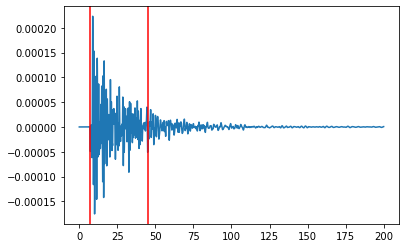

In [65]:
# peak and duration data for each point
absolute_peaks = []
durations = []
amplitudes = []
times = []
for i in range(len(file_list)):
    st = read(directory+file_list[i])
    tr = st[0]
    # tr.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    abs_data = abs(tr.data)
    time = tr.times()
    start = np.argmax(abs_data>0.00004)
    data_flipped = np.flip(abs_data)
    end = len(abs_data) - np.argmax(data_flipped>0.00004) - 1
    duration = time[end-1] - time[start]
    absolute_peaks.append(abs(max(tr.data, key=abs)))
    durations.append(duration)
    amplitudes.append(tr.data)
    times.append(tr.times())
    
    # test single point
    # set name of data point to name
    name = "BK.BRK.HN.u"
    if file_list[i] == name:
        print('peak: ', abs(max(tr.data, key=abs)))
        print('duration: ', [time[start], time[end]])
        plt.plot(time, tr.data)
        plt.axvline(x=time[start], color='r')
        plt.axvline(x=time[end], color='r')        

peak:  0.00159313
duration:  [92.209999999999994, 152.37]


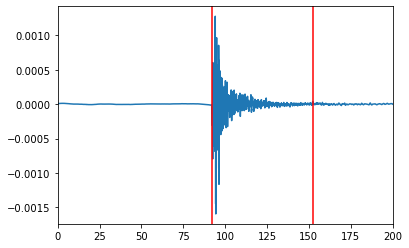

In [66]:
# peak and duration data for each observed point
obs_absolute_peaks = []
obs_durations = []
obs_amplitudes = []
obs_times = []
for i in range(len(obs_file_list)):
    st = read(obs_directory+obs_file_list[i])
    tr = st[0]
    abs_data = abs(tr.data)
    time = tr.times()
    start = np.argmax(abs_data>0.00004)
    data_flipped = np.flip(abs_data)
    end = len(abs_data) - np.argmax(data_flipped>0.00004) - 1
    duration = time[end-1] - time[start]
    obs_absolute_peaks.append(abs(max(tr.data, key=abs)))
    obs_durations.append(duration)
    obs_amplitudes.append(tr.data)
    obs_times.append(tr.times())
    
    # test single point
    # set name of data point to name
    name = "BK.BRK.HN.u"
    if obs_file_list[i] == name:
        print('peak: ', abs(max(tr.data, key=abs)))
        print('duration: ', [time[start], time[end]])
        plt.plot(time, tr.data)
        plt.axvline(x=time[start], color='r')
        plt.axvline(x=time[end], color='r')
        plt.xlim((0,200))

In [67]:
# full dataframe
df["Station"] = [x[:-5] for x in df["Point"]]
df["Amplitudes"] = amplitudes
df["Times"] = times
df["Absolute Peak"] = absolute_peaks
df["Duration"] = durations
df_with_locations = pd.merge(df, locations, left_on='Station', right_on='net.sta')
df_with_locations = df_with_locations.drop(columns=['net.sta'])
source = (37.86119, -122.24233)
df_with_locations['Distance (miles)'] = df_with_locations.apply(lambda row: distance.distance((row.lat, row.lon), source).miles, axis=1)
df_with_locations

,Point,Station,Amplitudes,Times,Absolute Peak,Duration,lat,lon,Distance (miles)
0,BK.BDM.HN.e,BK.BDM,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000380,54.107010,37.953970,-121.86554,21.561090
1,BK.BDM.HN.n,BK.BDM,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000315,53.202715,37.953970,-121.86554,21.561090
2,BK.BDM.HN.u,BK.BDM,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000358,54.446121,37.953970,-121.86554,21.561090
3,BK.BKS.HN.e,BK.BKS,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.001960,86.887720,37.876220,-122.23558,1.100331
4,BK.BKS.HN.n,BK.BKS,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.001214,76.526001,37.876220,-122.23558,1.100331
...,...,...,...,...,...,...,...,...,...
952,NP.ADS2.HN.n,NP.ADS2,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000211,28.372269,38.774460,-122.69974,67.717936
953,NP.ADS2.HN.u,NP.ADS2,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000110,20.459684,38.774460,-122.69974,67.717936
954,NP.PLA.HN.e,NP.PLA,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000247,42.690280,37.798672,-121.46315,42.840388
955,NP.PLA.HN.n,NP.PLA,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[0.0, 0.03767897654, 0.0753579530799, 0.113036...",0.000639,56.066317,37.798672,-121.46315,42.840388


In [68]:
# obs dataframe
obs_df["Station"] = [x[:-5] for x in obs_df["Point"]]
obs_df["Amplitudes"] = obs_amplitudes
obs_df["Times"] = obs_times
obs_df["Absolute Peak"] = obs_absolute_peaks
obs_df["Duration"] = obs_durations
obs_df = pd.merge(obs_df, locations, left_on='Station', right_on='net.sta')
obs_df = obs_df.drop(columns=['net.sta'])
source = (37.86119, -122.24233)
obs_df['Distance (miles)'] = obs_df.apply(lambda row: distance.distance((row.lat, row.lon), source).miles, axis=1)
obs_df

,Point,Station,Amplitudes,Times,Absolute Peak,Duration,lat,lon,Distance (miles)
0,BK.BDM.HN.e,BK.BDM,"[-5.11707e-07, -5.13278e-07, -5.15149e-07, -5....","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",0.001021,82.180,37.953970,-121.86554,21.561090
1,BK.BDM.HN.n,BK.BDM,"[-9.12081e-07, -9.13333e-07, -9.1607e-07, -9.1...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",0.001588,78.510,37.953970,-121.86554,21.561090
2,BK.BDM.HN.u,BK.BDM,"[2.55943e-07, 2.52683e-07, 2.51328e-07, 2.4788...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",0.000720,65.330,37.953970,-121.86554,21.561090
3,BK.BKS.HN.e,BK.BKS,"[-9.41834e-07, -9.44314e-07, -9.48473e-07, -9....","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",0.004232,60.950,37.876220,-122.23558,1.100331
4,BK.BKS.HN.n,BK.BKS,"[3.26108e-07, 3.30227e-07, 3.30789e-07, 3.3475...","[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",0.002665,63.650,37.876220,-122.23558,1.100331
...,...,...,...,...,...,...,...,...,...
890,NP.ADS2.HN.n,NP.ADS2,"[-1.61606e-05, -1.61772e-05, -1.61948e-05, -1....","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0...",0.000081,32.345,38.774460,-122.69974,67.717936
891,NP.ADS2.HN.u,NP.ADS2,"[-6.87644e-06, -6.88696e-06, -6.89823e-06, -6....","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0...",0.000112,26.690,38.774460,-122.69974,67.717936
892,NP.PLA.HN.e,NP.PLA,"[-2.47454e-06, -2.47874e-06, -2.48279e-06, -2....","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0...",0.000886,124.795,37.798672,-121.46315,42.840388
893,NP.PLA.HN.n,NP.PLA,"[2.22126e-06, 2.22438e-06, 2.22774e-06, 2.2313...","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0...",0.000887,134.910,37.798672,-121.46315,42.840388


# Visualizing Peaks and Duration for Each Direction

In [94]:
# only .e
east_west = df_with_locations.iloc[::3, :]
obs_east_west = obs_df.iloc[::3, :]
# only .n
north_south = df_with_locations.iloc[1::3, :]
obs_north_south = obs_df.iloc[::3, :]
# only .u
up_down = df_with_locations.iloc[1::3, :]
obs_up_down = obs_df.iloc[::3, :]

In [120]:
ew = px.scatter_mapbox(east_west, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,0.003), title="{SW4} Peak Amplitude at Each Individual Station (East-West)")
ew.update_traces(marker={'size': 8})
ew.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
ew.show()

obs_ew = px.scatter_mapbox(obs_east_west, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,0.003), title="{OBSERVED} Peak Amplitude at Each Individual Station (East-West)")
obs_ew.update_traces(marker={'size': 8})
obs_ew.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
obs_ew.show()

In [117]:
ns = px.scatter_mapbox(north_south, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,0.003), title="{SW4} Peak Amplitude at Each Individual Station (North-South)")
ns.update_traces(marker={'size': 8})

ns.show()

obs_ns = px.scatter_mapbox(obs_north_south, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,0.003), title="{OBSERVED} Peak Amplitude at Each Individual Station (North-South)")
obs_ns.update_traces(marker={'size': 8})

obs_ns.show()

In [118]:
ud = px.scatter_mapbox(up_down, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0, 0.003), title="{SW4} Peak Amplitude at Each Individual Station (Up-Down)")
ud.update_traces(marker={'size': 8})

ud.show()

obs_ud = px.scatter_mapbox(obs_up_down, lat='lat', lon='lon', color='Absolute Peak', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0, 0.003), title="{OBSERVED} Peak Amplitude at Each Individual Station (Up-Down)")
obs_ud.update_traces(marker={'size': 8})

obs_ud.show()

There does not seem to be major differences between each direction within each dataset, although the east-west peaks seem to be on average higher than the other directions in the San Franciso area for the sw4 data.

However, when you compare the sw4 data with the observed data, you can clearly see that the observed data has significantly higher amplitudes than what is generated by the model.

In [123]:
ew = px.scatter_mapbox(east_west, lat='lat', lon='lon', color='Duration', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,200), title="{SW4} Duration at Each Individual Station (East-West)")
ew.update_traces(marker={'size': 8})
ew.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
ew.show()

obs_ew = px.scatter_mapbox(obs_east_west, lat='lat', lon='lon', color='Duration', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,200), title="{OBSERVED} Duration at Each Individual Station (East-West)")
obs_ew.update_traces(marker={'size': 8})
obs_ew.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
obs_ew.show()

In [125]:
ns = px.scatter_mapbox(north_south, lat='lat', lon='lon', color='Duration', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,200), title="{SW4} Duration at Each Individual Station (North-South)")
ns.update_traces(marker={'size': 8})
ns.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
ns.show()

obs_ns = px.scatter_mapbox(obs_north_south, lat='lat', lon='lon', color='Duration', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,200), title="{OBSERVED} Duration at Each Individual Station (North-South)")
obs_ns.update_traces(marker={'size': 8})
obs_ns.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
obs_ns.show()

In [126]:
ud = px.scatter_mapbox(up_down, lat='lat', lon='lon', color='Duration', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,200), title="{SW4} Duration at Each Individual Station (Up-Down)")
ud.update_traces(marker={'size': 8})
ud.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
ud.show()

obs_ud = px.scatter_mapbox(obs_up_down, lat='lat', lon='lon', color='Duration', hover_name='Station', mapbox_style='stamen-terrain', color_continuous_scale = 
                'rainbow', range_color=(0,200), title="{OBSERVED} Duration at Each Individual Station (Up-Down)")
obs_ud.update_traces(marker={'size': 8})
obs_ud.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
obs_ud.show()

As you would probably expect after seeing the previous amplitude plots, the durations generated by sw4 are also much shorter than the observed data.

# Visualizing as 3D Vector Data

BK.BKS.HN
duration:  [7.5357953079940545, 94.951020880725096]


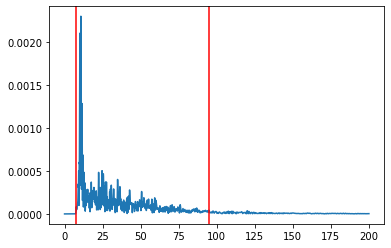

In [127]:
# creating 3D Vector Data
magnitudes = []
durations = []
peaks = []
for i in range(0, len(file_list), 3):
    st = read(directory+file_list[i])
    tr_e = st[0]
    #tr_e.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    x = tr_e.data
    st = read(directory+file_list[i+1])
    tr_n = st[0]
    #tr_n.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    y = tr_n.data
    st = read(directory+file_list[i+2])
    tr_u = st[0]
    #tr_u.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    z = tr_u.data
    mag = np.sqrt(x**2 + y**2 + z**2)
    start = np.argmax(mag>0.00004)
    mag_flipped = np.flip(mag)
    end = len(mag) - np.argmax(mag_flipped>0.00004) - 1
    time = tr_u.times()
    peak = max(mag)
    duration = time[end] - time[start]
    durations.append(duration)
    magnitudes.append(mag)
    peaks.append(peak)
    
    # test single point
    # set name of data point to name
    name = "BK.BKS.HN"
    if file_list[i][:-2] == name:
        print(file_list[i][:-2])
        plt.plot(time, mag)
        plt.axvline(x=time[start], color='r')
        plt.axvline(x=time[end], color='r')
        print('duration: ', [time[start], time[end]])

In [128]:
# new DataFrame for 3D Data
new_points = file_list[::3]
new_points = [x[:-2] for x in new_points]
df_3d = pd.DataFrame(data=new_points)
df_3d.columns = ['Point']
df_3d["Station"] = [x[:-3] for x in df_3d["Point"]]
df_3d["Magnitudes"] = magnitudes
df_3d["Peak"] = peaks
df_3d["Duration"] = durations
df_3d = pd.merge(df_3d, locations, left_on='Station', right_on='net.sta')
df_3d = df_3d.drop(columns=['net.sta'])
df_3d = df_3d.drop_duplicates(subset = ["Station"])

BK.BKS.HN
duration:  [92.549999999999997, 183.77000000000001]


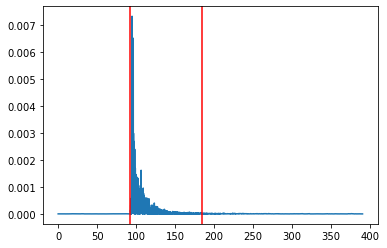

In [131]:
# creating obs 3D Vector Data
obs_magnitudes = []
obs_durations = []
obs_peaks = []
for i in range(0, len(obs_file_list), 3):
    st = read(obs_directory+obs_file_list[i])
    tr_e = st[0]
    #tr_e.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    x = tr_e.data
    st = read(obs_directory+obs_file_list[i])
    tr_n = st[0]
    #tr_n.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    y = tr_n.data
    st = read(obs_directory+obs_file_list[i])
    tr_u = st[0]
    #tr_u.filter('bandpass', freqmin=0.2, freqmax=0.5, corners=2, zerophase=True)
    z = tr_u.data
    mag = np.sqrt(x**2 + y**2 + z**2)
    start = np.argmax(mag>0.00004)
    mag_flipped = np.flip(mag)
    end = len(mag) - np.argmax(mag_flipped>0.00004) - 1
    time = tr_u.times()
    peak = max(mag)
    duration = time[end] - time[start]
    obs_durations.append(duration)
    obs_magnitudes.append(mag)
    obs_peaks.append(peak)
    
    # test single point
    # set name of data point to name
    name = "BK.BKS.HN"
    if obs_file_list[i][:-2] == name:
        print(obs_file_list[i][:-2])
        plt.plot(time, mag)
        plt.axvline(x=time[start], color='r')
        plt.axvline(x=time[end], color='r')
        print('duration: ', [time[start], time[end]])
        
# new DataFrame for 3D Data
obs_new_points = obs_file_list[::3]
obs_new_points = [x[:-2] for x in obs_new_points]
obs_df_3d = pd.DataFrame(data=obs_new_points)
obs_df_3d.columns = ['Point']
obs_df_3d["Station"] = [x[:-3] for x in obs_df_3d["Point"]]
obs_df_3d["Magnitudes"] = obs_magnitudes
obs_df_3d["Peak"] = obs_peaks
obs_df_3d["Duration"] = obs_durations
obs_df_3d = pd.merge(obs_df_3d, locations, left_on='Station', right_on='net.sta')
obs_df_3d = obs_df_3d.drop(columns=['net.sta'])
obs_df_3d = obs_df_3d.drop_duplicates(subset = ["Station"])

In [133]:
fig1 = px.scatter_mapbox(df_3d, lat='lat', lon='lon', color='Peak', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', range_color=(0, 0.003),
                         title="{SW4} Peak Amplitude (Using 3D Vector Data) at Each Individual Station")
fig1.update_traces(marker={'size': 8})
fig1.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig1.show()

obs_fig1 = px.scatter_mapbox(obs_df_3d, lat='lat', lon='lon', color='Peak', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', range_color=(0, 0.003),
                         title="{OBSERVED} Peak Amplitude (Using 3D Vector Data) at Each Individual Station")
obs_fig1.update_traces(marker={'size': 8})
obs_fig1.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
obs_fig1.show()

In [135]:
# can rescale to show trends better since data is so drastically different
fig2 = px.scatter_mapbox(df_3d, lat='lat', lon='lon', color='Duration', mapbox_style='stamen-terrain', hover_name='Station', color_continuous_scale = 
                'rainbow', range_color=(0, 200), title="{SW4} Duration of Earthquake (Using 3D Vector Data) at Each Individual Station")
fig2.update_traces(marker={'size': 8})
fig2.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig2.show()

obs_fig2 = px.scatter_mapbox(obs_df_3d, lat='lat', lon='lon', color='Duration', mapbox_style='stamen-terrain', hover_name='Station', color_continuous_scale = 
                'rainbow', range_color=(0, 200), title="{OBSERVED} Duration of Earthquake (Using 3D Vector Data) at Each Individual Station")
obs_fig2.update_traces(marker={'size': 8})
obs_fig2.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
obs_fig2.show()

Peak amplitude definitely shows a trend of decreasing as we move away from the source of the earthquake, duration seem to be determined by the terrain.

Again though, the observed data is pretty drastically different from the sw4 output.

# Plotting Peak Amplitude/Duration Vs Distance

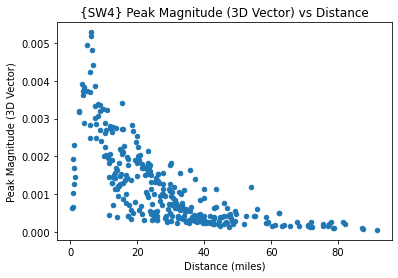

In [137]:
df_3d['Distance (miles)'] = df_3d.apply(lambda row: distance.distance((row.lat, row.lon), source).miles, axis=1)
df_3d.plot(x = 'Distance (miles)', y = 'Peak', kind = 'scatter', ylabel = 'Peak Magnitude (3D Vector)', xlabel = 'Distance (miles)', title = "{SW4} Peak Magnitude (3D Vector) vs Distance");

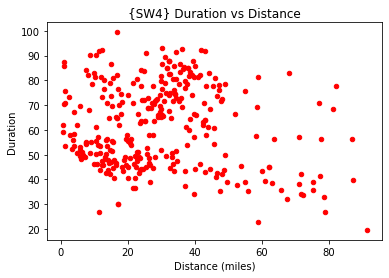

In [138]:
df_3d.plot(x = 'Distance (miles)', y = 'Duration', xlabel = 'Distance (miles)', kind = 'scatter', title = "{SW4} Duration vs Distance", color="r");

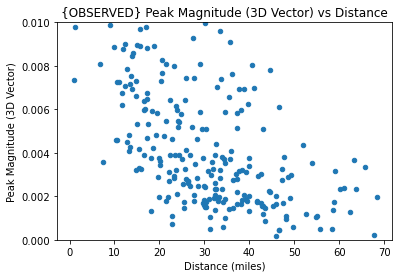

In [165]:
obs_df_3d['Distance (miles)'] = obs_df_3d.apply(
    lambda row: distance.distance((row.lat, row.lon), source).miles, axis=1)
obs_df_3d.plot(x = 'Distance (miles)', y = 'Peak', kind = 'scatter', ylim = (0, 0.01),
               ylabel = 'Peak Magnitude (3D Vector)', xlabel = 'Distance (miles)', 
               title = "{OBSERVED} Peak Magnitude (3D Vector) vs Distance");
# note - there is one very far outlier at about ~65 miles if you rescale

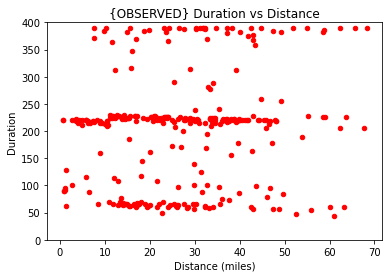

In [154]:
obs_df_3d.plot(x = 'Distance (miles)', y = 'Duration', ylim = (0, 400),
           xlabel = 'Distance (miles)', kind = 'scatter', title = "{OBSERVED} Duration vs Distance", color="r");

Definitely a more interesting trend going on for the observed data here. Distance seems to not correlate with the duration, but there are certain areas where the duration is almost exactly the same (possibly along a line on the map).

# Comparing Data Points

Here we compare NC.C033 and BK.BRK, because from the peak amplitude geographic plot it seems like BK.BRK is a very small value, even though it is about the same distance (very close) to the source. There could be an error in our computation.

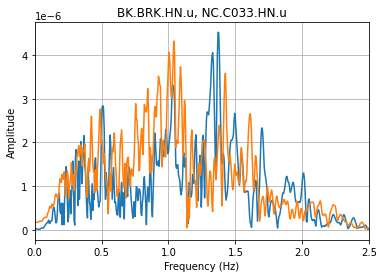

In [156]:
from scipy.fft import fft, ifft, fftfreq
indexed = df_with_locations.set_index('Point')
T = 0.037679 # delta seems to be the same for all points

point1 = 'BK.BRK.HN.u' # Can visualize whatever points you want
data1 = indexed.loc[point1]['Amplitudes']
times1 = indexed.loc[point1]['Times']
# For Fourier Transform, can do other visualizations
N = len(data1)
yf = fft(data1)
xf = fftfreq(N, T)[:N//2]
yf = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf)

point2 = 'NC.C033.HN.u' # Can visualize whatever point you want to compare
data2 = indexed.loc[point2]['Amplitudes']
times2 = indexed.loc[point2]['Times']
N = len(data2)
yf = fft(data2)
xf = fftfreq(N, T)[:N//2]
yf = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf)

plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)");
plt.xlim([0,2.5])
plt.title(point1 + ', ' + point2);

peak_amp_at = np.argmax(yf)
frequency = xf[peak_amp_at]
amp = yf[peak_amp_at]
point = (frequency, amp)

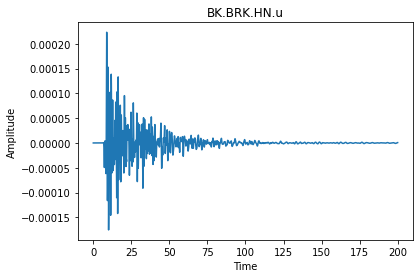

In [157]:
plt.plot(times1, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title(point1);

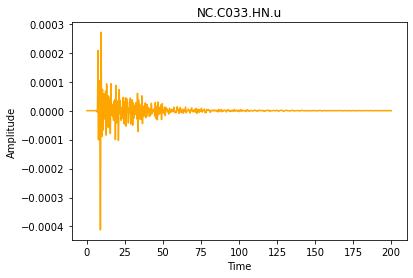

In [158]:
plt.plot(times2, data2, color='orange')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title(point2);

It seems like NC.C033 really does have a higher peak (it is very extreme at the start). BK.BRK actually has relatively low amplitudes despite being so close to the source, which is interesting. We will know if the model is accurate in simulating this once we have the true data.

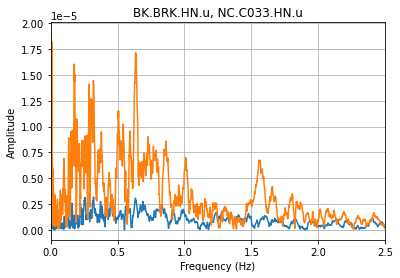

In [159]:
indexed = obs_df.set_index('Point')
point1 = 'BK.BRK.HN.u' # Can visualize whatever points you want
data1 = indexed.loc[point1]['Amplitudes']
times1 = indexed.loc[point1]['Times']
# For Fourier Transform, can do other visualizations
N = len(data1)
yf = fft(data1)
xf = fftfreq(N, T)[:N//2]
yf = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf)

point2 = 'NC.C033.HN.u' # Can visualize whatever points you want
data2 = indexed.loc[point2]['Amplitudes']
times2 = indexed.loc[point2]['Times']
N = len(data2)
yf = fft(data2)
xf = fftfreq(N, T)[:N//2]
yf = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf)

plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)");
plt.xlim([0,2.5])
plt.title(point1 + ', ' + point2);

peak_amp_at = np.argmax(yf)
frequency = xf[peak_amp_at]
amp = yf[peak_amp_at]
point = (frequency, amp)

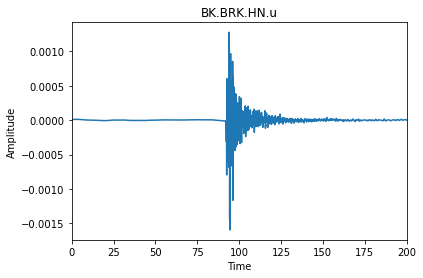

In [162]:
plt.plot(times1, data1)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title(point1);
plt.xlim((0, 200));

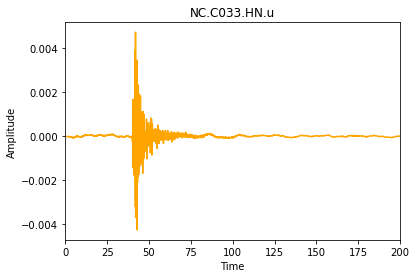

In [163]:
plt.plot(times2, data2, color='orange')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.xlim((0, 200))
plt.title(point2);

# Frequency Analysis

In [170]:
indexed = df_with_locations.set_index('Point')
frequency_table = []
Corr_Amp = []
for i in df_with_locations.Point:  
    data = indexed.loc[i]['Amplitudes']
    N = len(data)
    yf = fft(data)
    xf = fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(yf[0:N//2])
    peak_amp_at = np.argmax(yf)
    frequency = xf[peak_amp_at]
    amp = yf[peak_amp_at]
    point = (frequency, amp)

    peak_amp_at2 = np.argsort(yf, axis=0)[-2]
    frequency2 = xf[peak_amp_at2]
    amp2 = yf[peak_amp_at2]
    point2 = (frequency2, amp2)

    highest_points = pd.DataFrame([point, point2])
    firstfreq = highest_points.min()[0]
    frequency_table.append(firstfreq)
    amplification = highest_points.min()[1]
    Corr_Amp.append(amplification)
    
    
df_with_locations["Frequency"] = frequency_table 
df_with_locations["Corr_Amp"] = Corr_Amp

df_with_locations_u = df_with_locations[df_with_locations.Point.str.contains('.u')]
df_with_locations_n = df_with_locations[df_with_locations.Point.str.contains('.n')]
df_with_locations_e = df_with_locations[df_with_locations.Point.str.contains('.e')]

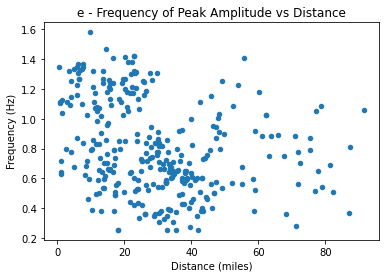

In [186]:
df_with_locations_e.plot(x = 'Distance (miles)', y = 'Frequency', kind = 'scatter', ylabel = 'Frequency (Hz)', xlabel = 'Distance (miles)', title = "e - Frequency of Peak Amplitude vs Distance")
fig_e = px.scatter_mapbox(df_with_locations_e, lat='lat', lon='lon', color='Frequency', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', 
                         title="Frequency Value of Peak Amplitude at Each Individual Station (East-West)")
fig_e.update_traces(marker={'size': 8})
fig_e.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig_e.show();

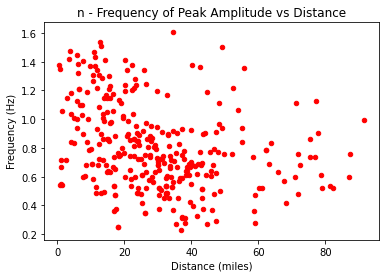

In [187]:
df_with_locations_n.plot(x = 'Distance (miles)', y = 'Frequency', kind = 'scatter', ylabel = 'Frequency (Hz)', xlabel = 'Distance (miles)', title = "n - Frequency of Peak Amplitude vs Distance", color="r")
fig_n = px.scatter_mapbox(df_with_locations_n, lat='lat', lon='lon', color='Frequency', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', 
                         title="Frequency Value of Peak Amplitude at Each Individual Station (North-South)")
fig_n.update_traces(marker={'size': 8})
fig_n.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig_n.show()

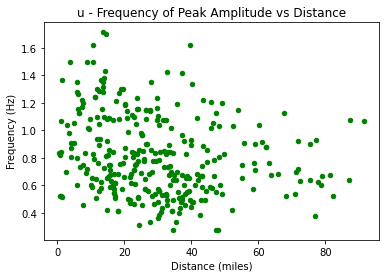

In [188]:
df_with_locations_u.plot(x = 'Distance (miles)', y = 'Frequency', kind = 'scatter', ylabel = 'Frequency (Hz)', xlabel = 'Distance (miles)', title = "u - Frequency of Peak Amplitude vs Distance", color="g")
fig_u = px.scatter_mapbox(df_with_locations_u, lat='lat', lon='lon', color='Frequency', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', 
                         title="Frequency Value of Peak Amplitude at Each Individual Station (Up-Down)")
fig_u.update_traces(marker={'size': 8})
fig_u.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig_u.show()

In [195]:
#test
def create_3d_df(directory, file_list, bandpass, bp_range):
    magnitudes = []
    durations = []
    peaks = []
    for i in range(0, len(file_list), 3):
        st = read(directory+file_list[i])
        tr_e = st[0]
        if bandpass:
            tr_e.filter('bandpass', freqmin=bp_range[0], freqmax=bp_range[1], corners=2, zerophase=True)
        x = tr_e.data
        st = read(directory+file_list[i+1])
        tr_n = st[0]
        if bandpass:
            tr_n.filter('bandpass', freqmin=bp_range[0], freqmax=bp_range[1], corners=2, zerophase=True)
        y = tr_n.data
        st = read(directory+file_list[i+2])
        tr_u = st[0]
        if bandpass:
            tr_u.filter('bandpass', freqmin=bp_range[0], freqmax=bp_range[1], corners=2, zerophase=True)
        z = tr_u.data
        mag = np.sqrt(x**2 + y**2 + z**2)
        start = np.argmax(mag>0.00004)
        mag_flipped = np.flip(mag)
        end = len(mag) - np.argmax(mag_flipped>0.00004) - 1
        time = tr_u.times()
        peak = max(mag)
        duration = time[end] - time[start]
        durations.append(duration)
        magnitudes.append(mag)
        peaks.append(peak)

    # new DataFrame for band-passed 3D Data
    new_points = file_list[::3]
    new_points = [x[:-2] for x in new_points]
    df_3d_bp = pd.DataFrame(data=new_points)
    df_3d_bp.columns = ['Point']
    df_3d_bp["Station"] = [x[:-3] for x in df_3d_bp["Point"]]
    df_3d_bp["Magnitudes"] = magnitudes
    df_3d_bp["Peak"] = peaks
    df_3d_bp["Duration"] = durations
    df_3d_bp = pd.merge(df_3d_bp, locations, left_on='Station', right_on='net.sta')
    df_3d_bp = df_3d_bp.drop(columns=['net.sta'])
    df_3d_bp = df_3d_bp.drop_duplicates(subset = ["Station"])
    return df_3d_bp

In [198]:
df_3d_bp = create_3d_df(directory, file_list, True, [0.2, 0.5])

In [199]:
df_3d_bp1 = create_3d_df(directory, file_list, True, [0.5, 1])

In [200]:
fig1 = px.scatter_mapbox(df_3d_bp, lat='lat', lon='lon', color='Peak', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', range_color=(0, 0.002),
                         title="{SW4} Peak Amplitude (Using Band-Passed [0.2-0.5] 3D Vector Data) at Each Individual Station")
fig1.update_traces(marker={'size': 8})
fig1.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig1.show()

In [201]:
fig2 = px.scatter_mapbox(df_3d_bp1, lat='lat', lon='lon', color='Peak', hover_name='Station', 
                         mapbox_style='stamen-terrain', color_continuous_scale = 
                        'rainbow', range_color=(0, 0.002),
                         title="{SW4} Peak Amplitude (Using Band-Passed [0.5-1.0] 3D Vector Data) at Each Individual Station")
fig2.update_traces(marker={'size': 8})
fig2.add_scattermapbox(lat=[37.86119], lon=[-122.24233], 
                     hovertemplate = 'SOURCE',
                     marker_size = 15,
                     marker_color = 'pink',
                     showlegend = False
                     )
fig2.show()